In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3176
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2867
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2567
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2289
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2027
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1743
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1511
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1265
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1045
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0829
Epoch 11/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0635
Epoch 12/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0456
Epoch 13/100
5/5 [==============================] - 0s 2ms/st

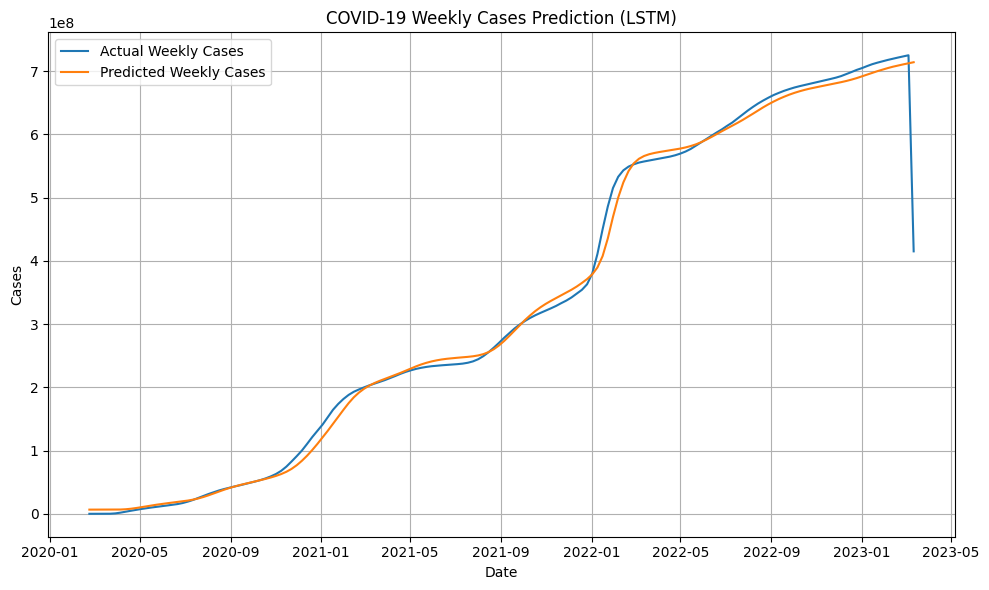

In [6]:
df = pd.read_csv("cleaned_US_cases_and_deaths.csv", parse_dates=['Date'])

weekly_df = df.groupby(pd.Grouper(key='Date', freq='W'))['Cases'].sum().reset_index()

# normalize case values
scaler = MinMaxScaler()
cases_scaled = scaler.fit_transform(weekly_df[['Cases']])

# create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 4  # number of weeks to look back
X, y = create_sequences(cases_scaled, seq_length)
X = X.reshape((X.shape[0], X.shape[1], 1))

# define LSTM 
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# train model
model.fit(X, y, epochs=100, verbose=1)

y_pred = model.predict(X)
y_pred_inverse = scaler.inverse_transform(y_pred)
y_true_inverse = scaler.inverse_transform(y)

# plotting
plt.figure(figsize=(10, 6))
plt.plot(weekly_df['Date'][seq_length:], y_true_inverse, label='Actual Weekly Cases')
plt.plot(weekly_df['Date'][seq_length:], y_pred_inverse, label='Predicted Weekly Cases')
plt.title("COVID-19 Weekly Cases Prediction (LSTM)")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_true_inverse, y_pred_inverse)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true_inverse, y_pred_inverse)
r2 = r2_score(y_true_inverse, y_pred_inverse)
n = len(y_true_inverse)
p = 1  # one predictor 
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("Model Evaluation Metrics:")
print(f"📉 MSE: {mse:.2f}")
print(f"📈 RMSE: {rmse:.2f}")
print(f"📊 MAE: {mae:.2f}")
print(f"🧠 R² Score: {r2:.4f}  (1.0 = perfect prediction)")
print(f"🧮 Adjusted R² Score: {adjusted_r2:.4f}")

Model Evaluation Metrics:
📉 MSE: 77809386698.86
📈 RMSE: 278943.34
📊 MAE: 93400.14
🧠 R² Score: 0.9882  (1.0 = perfect prediction)
🧮 Adjusted R² Score: 0.9881


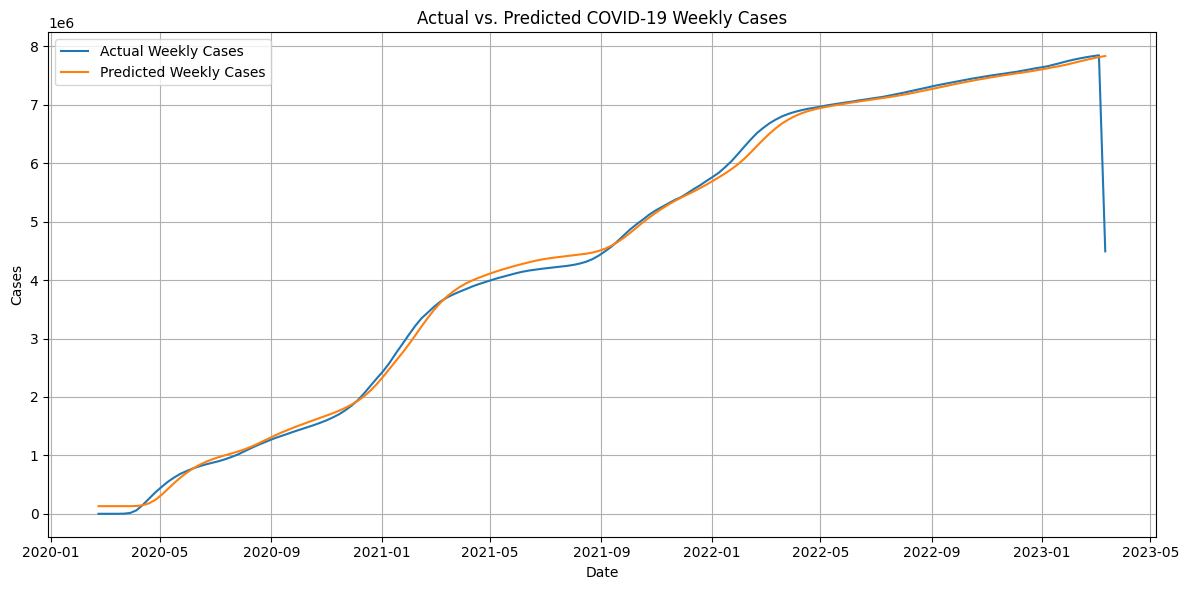

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(weekly_df['Date'][seq_length:], y_true_inverse, label='Actual Weekly Cases')
plt.plot(weekly_df['Date'][seq_length:], y_pred_inverse, label='Predicted Weekly Cases')
plt.title("Actual vs. Predicted COVID-19 Weekly Cases")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

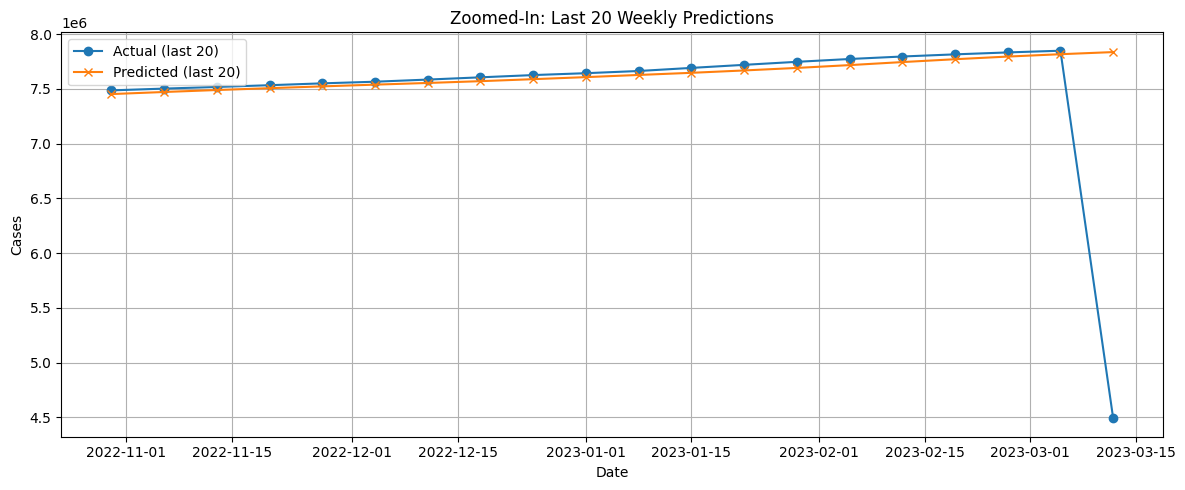

In [14]:
plt.figure(figsize=(12, 5))
plt.plot(weekly_df['Date'][seq_length:][-20:], y_true_inverse[-20:], marker='o', label='Actual (last 20)')
plt.plot(weekly_df['Date'][seq_length:][-20:], y_pred_inverse[-20:], marker='x', label='Predicted (last 20)')
plt.title("Zoomed-In: Last 20 Weekly Predictions")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4351
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3935
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3527
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3163
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2814
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2489
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2152
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1840
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1521
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1215
Epoch 11/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0903
Epoch 12/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0618
Epoch 13/100
5/5 [==============================] - 0s 2ms/st

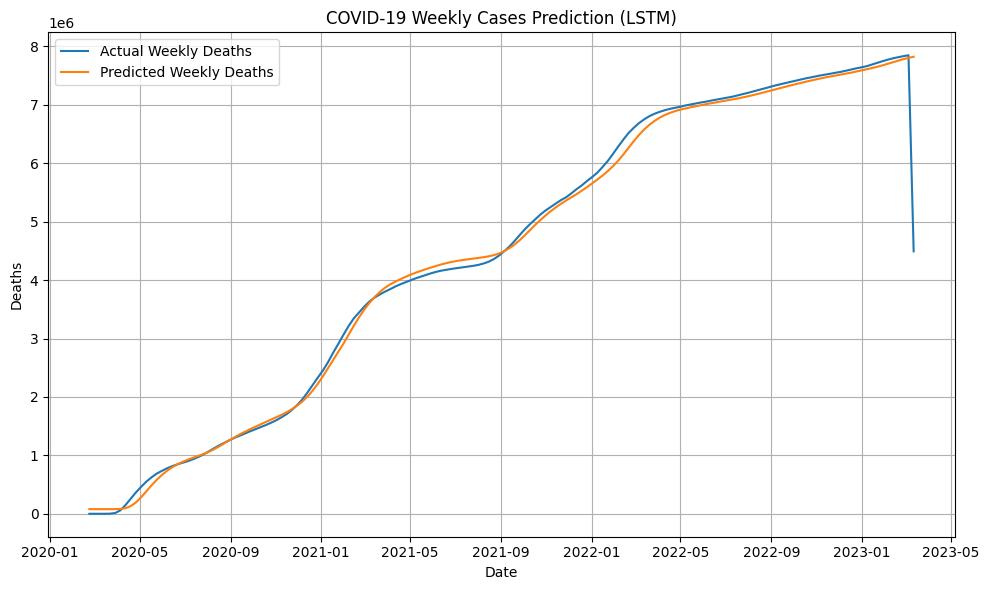

In [19]:
df = pd.read_csv("cleaned_US_cases_and_deaths.csv", parse_dates=['Date'])

weekly_death_df = df.groupby(pd.Grouper(key='Date', freq='W'))['Deaths'].sum().reset_index()

# normalize case values
scaler = MinMaxScaler()
death_scaled = scaler.fit_transform(weekly_death_df[['Deaths']])

# create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 4  # number of weeks to look back
X, y = create_sequences(death_scaled, seq_length)
X = X.reshape((X.shape[0], X.shape[1], 1))

# define LSTM 
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# train 
model.fit(X, y, epochs=100, verbose=1)

y_pred = model.predict(X)
y_pred_inverse = scaler.inverse_transform(y_pred)
y_true_inverse = scaler.inverse_transform(y)

# plotting
plt.figure(figsize=(10, 6))
plt.plot(weekly_death_df['Date'][seq_length:], y_true_inverse, label='Actual Weekly Deaths')
plt.plot(weekly_death_df['Date'][seq_length:], y_pred_inverse, label='Predicted Weekly Deaths')
plt.title("COVID-19 Weekly Cases Prediction (LSTM)")
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
d_mse = mean_squared_error(y_true_inverse, y_pred_inverse)
d_rmse = np.sqrt(mse)
d_mae = mean_absolute_error(y_true_inverse, y_pred_inverse)
d_r2 = r2_score(y_true_inverse, y_pred_inverse)
d_n = len(y_true_inverse)
d_p = 1  # one predictor 
d_adjusted_r2 = 1 - (1 - d_r2) * (d_n - 1) / (d_n - d_p - 1)
print("Model Evaluation Metrics:")
print(f"📉 MSE: {d_mse:.2f}")
print(f"📈 RMSE: {d_rmse:.2f}")
print(f"📊 MAE: {d_mae:.2f}")
print(f"🧠 R² Score: {d_r2:.4f}  (1.0 = perfect prediction)")
print(f"🧮 Adjusted R² Score: {d_adjusted_r2:.4f}")

Model Evaluation Metrics:
📉 MSE: 77702016139.50
📈 RMSE: 278943.34
📊 MAE: 97400.42
🧠 R² Score: 0.9882  (1.0 = perfect prediction)
🧮 Adjusted R² Score: 0.9881


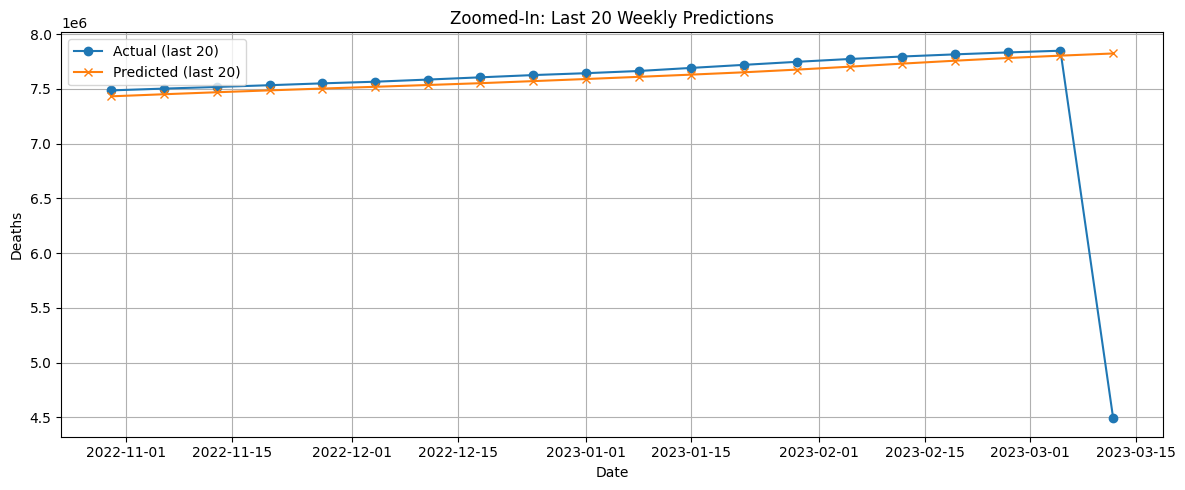

In [21]:
plt.figure(figsize=(12, 5))
plt.plot(weekly_death_df['Date'][seq_length:][-20:], y_true_inverse[-20:], marker='o', label='Actual (last 20)')
plt.plot(weekly_death_df['Date'][seq_length:][-20:], y_pred_inverse[-20:], marker='x', label='Predicted (last 20)')
plt.title("Zoomed-In: Last 20 Weekly Predictions")
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
df.head()

,Date,UID,iso2,iso3,code3,Province_State,Country_Region,Lat,Long_,Combined_Key,Cases,Population,Deaths
0,2020-01-22,84040005,US,USA,840,Oklahoma,US,34.373666,-96.038025,"Atoka, Oklahoma, US",0,13758,0
1,2020-01-22,84004009,US,USA,840,Arizona,US,32.931669,-109.888218,"Graham, Arizona, US",0,38837,0
2,2020-01-22,84046065,US,USA,840,South Dakota,US,44.390915,-99.996611,"Hughes, South Dakota, US",0,17526,0
3,2020-01-22,84038085,US,USA,840,North Dakota,US,46.113233,-101.044015,"Sioux, North Dakota, US",0,4230,0
4,2020-01-22,84006063,US,USA,840,California,US,40.003560,-120.839524,"Plumas, California, US",0,18807,0
